In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import sys
from random import sample
from pandas import DataFrame
from decimal import Decimal as DC
from decimal import getcontext
import heapq

In [15]:
#Import the dataset and  process it 
data = pd.read_csv("BankProblem.txt")
ndarray=data.values.reshape([100,3])

col_bag=[]
col_weight=[]
col_value=[]
for i in range(0,len(ndarray)):
    # Regular expression to read numbers
    bag=re.findall('\d+',ndarray[i][0])
    col_bag.append(bag[0])
    # Regular expression to read numbers including decimals
    weight = re.findall('\d+\.?\d*', ndarray[i][1])
    col_weight.append(weight[0])
    # Regular expression to read numbers
    value=re.findall('\d+\.?\d*', ndarray[i][2])
    col_value.append(value[0])
# print(col_bag)
# print(col_weight)
# print(col_value)
table_data={'bag':col_bag,'weight':col_weight,'value':col_value}
table=pd.DataFrame(table_data)
pd.DataFrame(table)

,bag,weight,value
0,1,9.4,57
1,2,7.4,94
2,3,7.7,59
3,4,7.4,83
4,5,2.9,82
...,...,...,...
95,96,3.9,76
96,97,9.6,53
97,98,7.1,59
98,99,3.9,40


In [16]:
#GA functions


#Initialize population
def init(popsize,n): 
    population=[]
    for i in range(popsize):
        pop=''
        for j in range(n):
            pop=pop+str(np.random.randint(0,2))
        population.append(pop)    
    return population


#Decode
def decode(x):
    bag=[]#储存被选择物体的下标集合
    weight=0
    value=0
    for i in range(n):
        if (x[i] == '1'):
            if weight + float(w[i])<= W:
                weight = weight+float(w[i])
                value = value+int(c[i])
                bag.append(i)
            else:
                weight = weight+float(w[i])
                value = 0
                bag.append(i)
            
    return value,weight,bag




#Caculate
def fitness(population):
    allvalues = []
    allweight = []
    allbags = []
    for i in range(len(population)):
        [value,weight,bag]= decode(population[i])
        
        allvalues.append(value)
        allweight.append(weight)
        allbags.append(bag)
    return allvalues,allweight,allbags


#Binary tournament selection
def binary_tournament(population,ppvalue):
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, popsize-1)
    fighter_2 = random.randint(0, popsize-1)
    
    # Get fitness score for each
    fighter_1_fitness = ppvalue[fighter_1]
    fighter_2_fitness = ppvalue[fighter_2]
    
    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    if fighter_1_fitness >= fighter_2_fitness:
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return the chromsome of the winner
    return population[winner]



def tournament_select(population,ppvalue,t):
    
    tournament_size = random.sample(ppvalue, t) 
    winner = max(tournament_size)
    winner_index = ppvalue.index(max(ppvalue))
    # Return the chromsome of the winner
    return population[winner_index]



#Single-point crossover
def crossover(parents_a,parents_b):
    point=np.random.randint(0,len(parents_a)-1)
    off_c=parents_a[:point]+parents_b[point:]
    off_d=parents_b[:point]+parents_a[point:]
    offspring=[off_c,off_d]
    return offspring

#Single-point mutation
def mutation(offspring,pm):
    for i in range(len(offspring)):
        r=np.random.uniform(0,1)
        if r<=pm:
            point=np.random.randint(0,len(offspring[i]))
            if point==0:
                if offspring[i][point]=='1':
                    offspring[i]='0'+offspring[i][1:]
                else:
                    offspring[i]='1'+offspring[i][1:]
            else:
                if offspring[i][point]=='1':
                    offspring[i]=offspring[i][:(point-1)]+'0'+offspring[i][point:]
                else:
                    offspring[i]=offspring[i][:(point-1)]+'1'+offspring[i][point:]
    return offspring


    
#Select the weakest
def selectweak(ppvalue):
    weakvalue = min(ppvalue)
    weakindex = ppvalue.index(min(ppvalue))
    return weakvalue,weakindex


In [21]:
#Read the data column in the data set
bag = list(np.array(table.loc[:, ['bag']])[:,0])
weight = list(np.array(table.loc[:, ['weight']])[:,0])
value = list(np.array(table.loc[:, ['value']])[:,0])

#Parameters
gen = 10000 #Number of iterations
t = 2
pm = 0.05 #Mutation rate
mu = 1 #Number of mutations
popsize= 100 #Population size
n = 100 #Chromosome size
w = weight #List of weights of each bag
c = value #List of values of each bag
b = bag #List of number of each bag
W = 277 #Capacity limit

In [22]:
# #Main algorithm
population = init(popsize,n) #Initialize population
ppvalue,ppweight,ppbag = fitness(population) #Caculate fitnesses and weights

#Iteration
maxvalues = []
maxindexs = []
maxweights = []
maxbags = []
for i in range(gen):
    #select parents
    parent_a = binary_tournament(population,ppvalue)
    parent_b = binary_tournament(population,ppvalue)
    #cross
    offspring = crossover(parent_a,parent_b)
    #mutation
    for k in range(mu):
        muoff = mutation(offspring,pm)

    mvalue,mweight,mbag = fitness(muoff)
    e = muoff[0]
    f = muoff[1]
    ev = mvalue[0] 
    fv = mvalue[1] 
    #select weak
    weak1,weak1_index = selectweak(ppvalue)
    #replace
    if ev > weak1:
        population[weak1_index] = e
    weak2,weak2_index = selectweak(ppvalue)
    if fv > weak2:
        population[weak2_index] = e
    #new fitness
    ppvalue,ppweight,ppbag = fitness(population)
    
    max_value = max(ppvalue) #Optimal value of this generation
    max_index = ppvalue.index(max(ppvalue))
    max_weight = ppweight[max_index]
    max_bag = ppbag[max_index]
    
    maxvalues.append(max_value)
    maxindexs.append(max_index)
    maxweights.append(max_weight)
    maxbags.append(max_bag)

In [23]:
#Print results

bestvalue = max(maxvalues) 
best_index = maxvalues.index(max(maxvalues))
bestweight = maxweights[best_index]
bestbag = maxbags[best_index]
bagnumber = [i + 1 for i in bestbag]

print("generation of optimal value:",best_index)
print("optimal value:",bestvalue)
print("weight of the optimal value:",bestweight)
print("selected bags of the optimal value:",bagnumber)  

generation of optimal value: 17389
optimal value: 4314
weight of the optimal value: 276.3999999999999
selected bags of the optimal value: [2, 4, 5, 6, 8, 9, 11, 13, 15, 16, 18, 20, 21, 22, 24, 25, 27, 28, 29, 31, 34, 36, 38, 40, 42, 43, 44, 45, 46, 48, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 69, 70, 73, 74, 76, 77, 78, 80, 83, 84, 87, 89, 90, 91, 95, 96, 99, 100]


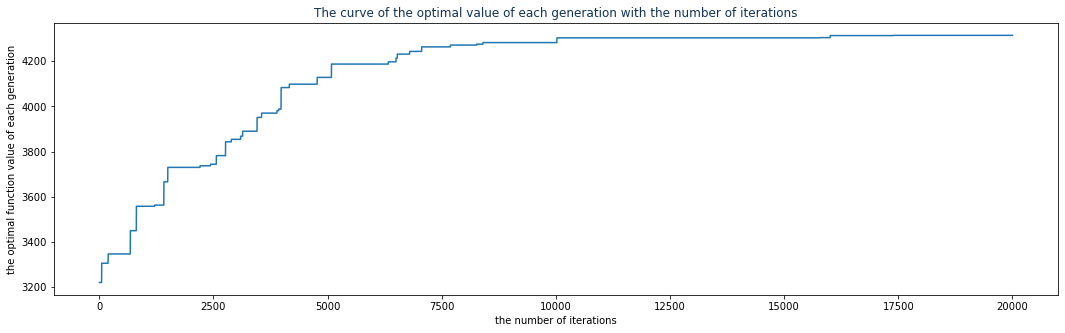

In [24]:
#polot the curve
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(18,5))
plt.plot(maxvalues)
plt.title('The curve of the optimal value of each generation with the number of iterations',color='#123456')
plt.xlabel('the number of iterations')
plt.ylabel('the optimal function value of each generation')
plt.savefig("11.png")
plt.show()
